___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [3]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.10, random_state = 42)

In [6]:
# Print the toatal number of images in datasets
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_val)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 54000 images in the training dataset
There are 6000 images in the training dataset
There are 10000 images in the test dataset


In [7]:
# Checking the shape of one image
X_train[100].shape

(28, 28)

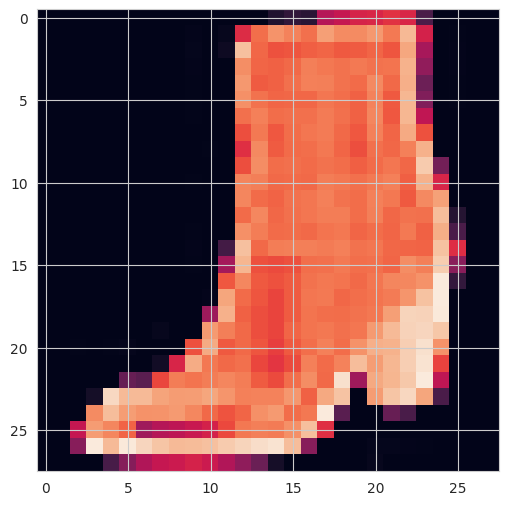

In [8]:
plt.imshow(X_train[5])

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

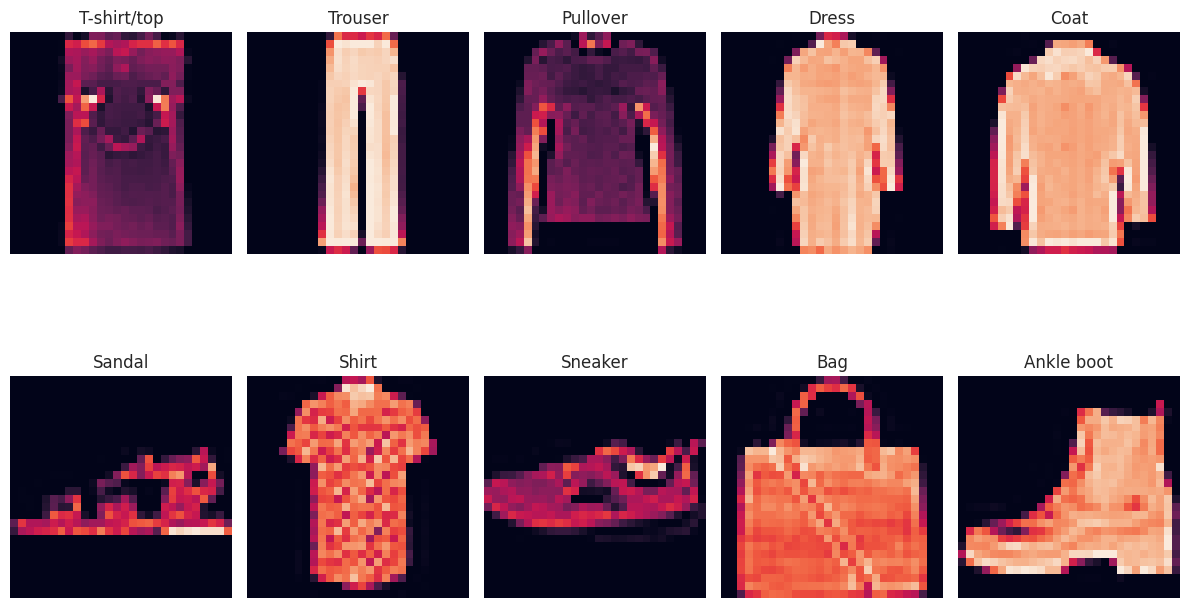

In [10]:
# Create a grid of subplots to view one image from each classes that is presented in the datasets
fig, axes = plt.subplots(2, 5, figsize=(12, 8))

# Iterate through classes and display images
for i, ax in enumerate(axes.flat):
    class_indices = np.where(y_train == i)[0]
    class_index = class_indices[0] if len(class_indices) > 0 else 0
    img = X_train[class_index].reshape(28, 28)
    ax.imshow(img)
    ax.set_title(classes[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


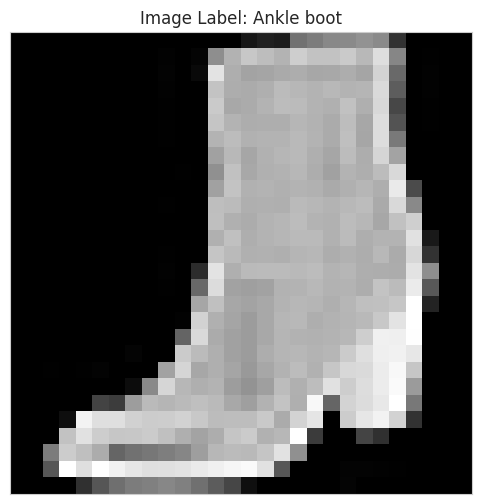

In [11]:
# Choose any index from the dataset
image_index = 5

# Display the image
plt.imshow(X_train[image_index], cmap='gray')
plt.title(f'Image Label: {classes[y_train[image_index]]}')
plt.xticks([])
plt.yticks([])
plt.show()


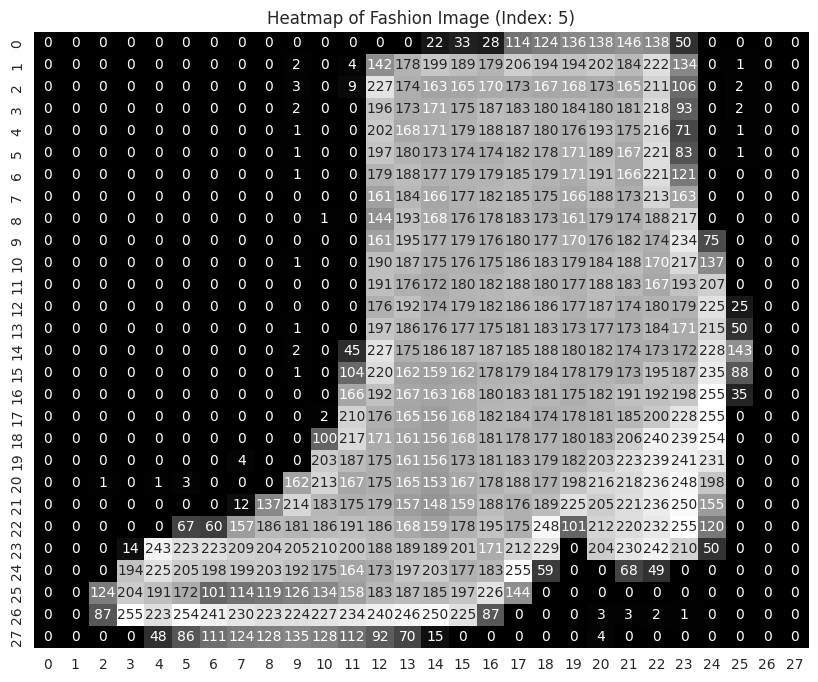

In [12]:
# To gain insights into the intensity distribution of the pixels in the selected image.
# Choose an index from the dataset
image_index = 5

# Create a heatmap of the selected image
plt.figure(figsize=(10, 8))
sns.heatmap(X_train[image_index], annot=True, cmap="gray", fmt=".3g", cbar=False)
plt.title(f"Heatmap of Fashion Image (Index: {image_index})")
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
# Cheacking before Normalizing
X_train[9].min()

0

In [14]:
X_train[9].max()

255

In [15]:
# Normalize X_train and X_test data
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_val = X_val.astype ("float32")
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [16]:
# Looking at the difference after normalizing
X_train[9].min()

0.0

In [17]:
X_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [18]:
# Reshape the X arrays to include a 4th dimension for the single channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [19]:
X_train.shape

(54000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [22]:
X_val.shape

(6000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
# To check the number of classes
num_classes = len(np.unique(y_train))
print("Number of classes in y_train:", num_classes)

Number of classes in y_train: 10


In [25]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)
Y_val = to_categorical(y_val, num_classes)

# Check the shape after one-hot encoding
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)
print("Y_val shape: ", Y_val.shape)


Y_train shape: (54000, 10)
Y_test shape: (10000, 10)
Y_val shape:  (6000, 10)


In [26]:
y_train.shape

(54000,)

In [27]:
Y_train.shape

(54000, 10)

In [28]:
X_train.shape

(54000, 28, 28, 1)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [30]:
# Create a Sequential model
model = Sequential()

model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], run_eagerly=True)

In [31]:
# Print the model summary to see the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1, restore_best_weights = True)

In [34]:
# Train the model with EarlyStopping
model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data = (X_val , Y_val), callbacks=[early_stopping])

Epoch 1/20
844/844 [==============================] - 99s 118ms/step - loss: 0.2689 - accuracy: 0.9028 - val_loss: 0.2606 - val_accuracy: 0.9035
Epoch 3/20
844/844 [==============================] - 97s 115ms/step - loss: 0.2229 - accuracy: 0.9179 - val_loss: 0.2355 - val_accuracy: 0.9165
Epoch 4/20
844/844 [==============================] - 101s 120ms/step - loss: 0.1901 - accuracy: 0.9301 - val_loss: 0.2282 - val_accuracy: 0.9173
Epoch 5/20
844/844 [==============================] - 98s 116ms/step - loss: 0.1633 - accuracy: 0.9404 - val_loss: 0.2288 - val_accuracy: 0.9198
Epoch 6/20
844/844 [==============================] - 99s 117ms/step - loss: 0.1409 - accuracy: 0.9488 - val_loss: 0.2567 - val_accuracy: 0.9143
Epoch 7/20
844/844 [==============================] - 98s 116ms/step - loss: 0.1218 - accuracy: 0.9551 - val_loss: 0.2455 - val_accuracy: 0.9215
Epoch 7: early stopping


**TASK 7: Plot values of metrics you used in your model.**

In [35]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.418,0.850,0.294,0.892
1,0.269,0.903,0.261,0.904
2,0.223,0.918,0.235,0.916
3,0.190,0.930,0.228,0.917
4,0.163,0.940,0.229,0.920


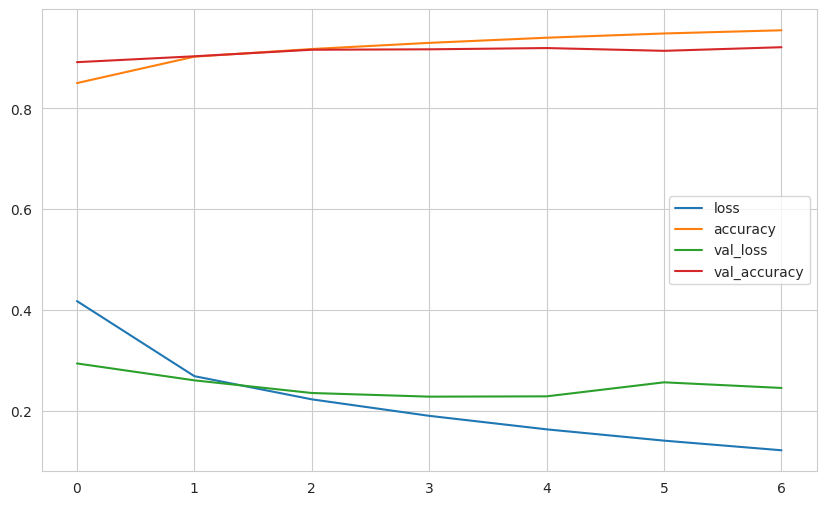

In [36]:
loss_df.plot()
plt.show()

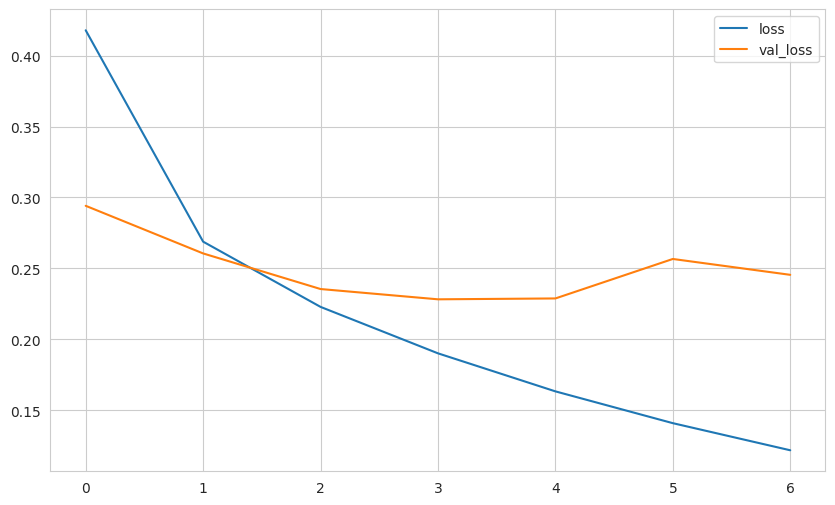

In [37]:
loss_df[["loss", "val_loss"]].plot();

## Comments about the above graph:
We can see there is an overfitting as the line for "val_loss" is increasing as they go further.

<Axes: >

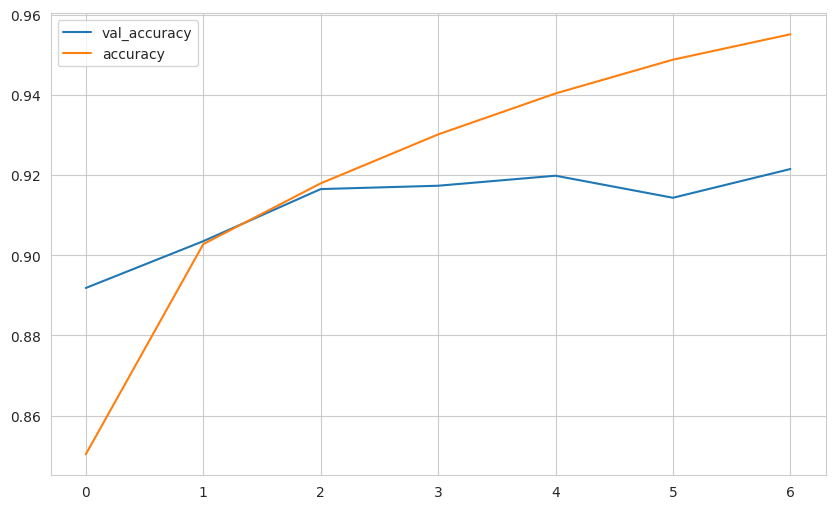

In [38]:
loss_df[["val_accuracy", "accuracy"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from keras.models import Sequential

In [40]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.251422256231308
Accuracy: 0.9128000140190125


In [41]:
# Make predictions on the test data
pred_prob = model.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 4s 14ms/step


In [42]:
# Convert true labels to class labels if y_test_arg is not already in class labels form
y_test_arg = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_test_arg, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[869   0  19  10   7   1  82   0  12   0]
 [  0 988   0   4   4   0   2   0   2   0]
 [ 17   0 863   6  77   0  37   0   0   0]
 [  8  15  13 888  50   0  24   0   2   0]
 [  1   1  46  10 917   0  23   0   2   0]
 [  0   0   0   0   0 983   0  11   1   5]
 [104   0  65  23  99   0 699   0  10   0]
 [  0   0   0   0   0   5   0 979   1  15]
 [  3   1   0   2   4   1   1   2 986   0]
 [  1   0   0   0   0   8   0  35   0 956]]


In [43]:
# Calculate classification report
class_report = classification_report(y_test_arg, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.98      0.99      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.94      0.89      0.91      1000
           4       0.79      0.92      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.70      0.75      1000
           7       0.95      0.98      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



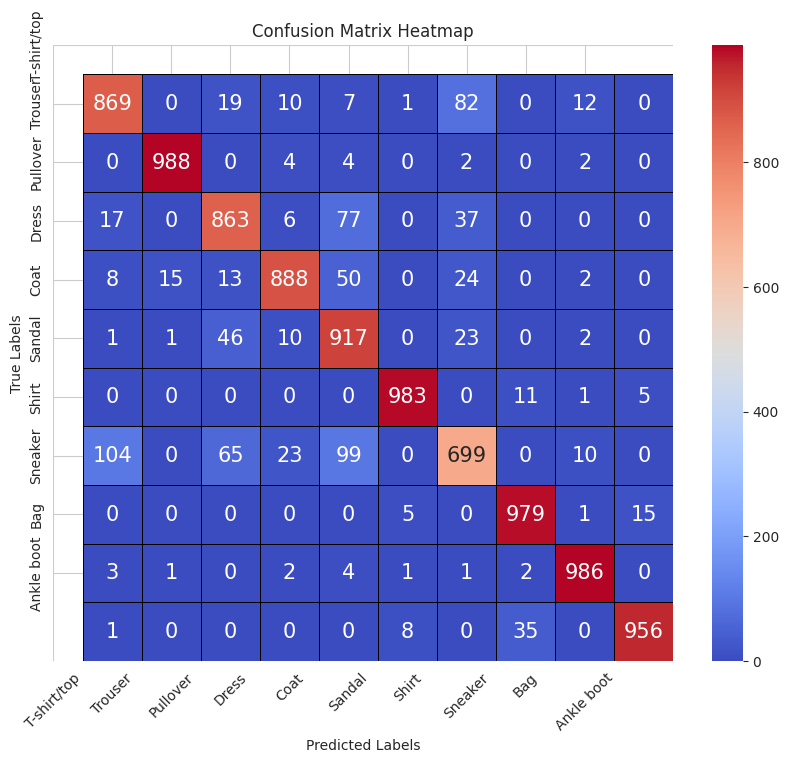

In [44]:
plt.figure(figsize=(10, 8))

cm = confusion_matrix(y_test_arg, y_pred)

# Generate a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size": 15})

# Set labels for the axes and the plot title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Set x-axis and y-axis tick labels based on the class names
tick_marks = [i - 0.5 for i in range(len(classes))]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the heatmap
plt.show()


## Prediction

In [45]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [46]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

872

In [47]:
np.equal(y_test, y_pred).sum()

9128

## Creating Model 2 by adding a dropout layer and changing the epoch

In [48]:
from tensorflow.keras.layers import Dropout

In [49]:
# Create a Sequential model2
model2 = Sequential()

model2.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'], run_eagerly=True)

In [50]:
# Train the model with EarlyStopping
model2.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data = (X_val , Y_val), callbacks=[early_stopping])

Epoch 1/10
844/844 [==============================] - 101s 120ms/step - loss: 0.5633 - accuracy: 0.8085 - val_loss: 0.3207 - val_accuracy: 0.8868
Epoch 2/10
844/844 [==============================] - 103s 122ms/step - loss: 0.3765 - accuracy: 0.8692 - val_loss: 0.2703 - val_accuracy: 0.9002
Epoch 3/10
844/844 [==============================] - 102s 120ms/step - loss: 0.3323 - accuracy: 0.8832 - val_loss: 0.2600 - val_accuracy: 0.9068
Epoch 4/10
844/844 [==============================] - 101s 120ms/step - loss: 0.3079 - accuracy: 0.8906 - val_loss: 0.2530 - val_accuracy: 0.9080
Epoch 5/10
844/844 [==============================] - 102s 121ms/step - loss: 0.2896 - accuracy: 0.8971 - val_loss: 0.2444 - val_accuracy: 0.9105
Epoch 6/10
844/844 [==============================] - 101s 120ms/step - loss: 0.2767 - accuracy: 0.9020 - val_loss: 0.2448 - val_accuracy: 0.9132
Epoch 7/10
844/844 [==============================] - 103s 122ms/step - loss: 0.2651 - accuracy: 0.9071 - val_loss: 0.2361 -

In [51]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.563,0.808,0.321,0.887
1,0.376,0.869,0.270,0.900
2,0.332,0.883,0.260,0.907
3,0.308,0.891,0.253,0.908
4,0.290,0.897,0.244,0.910


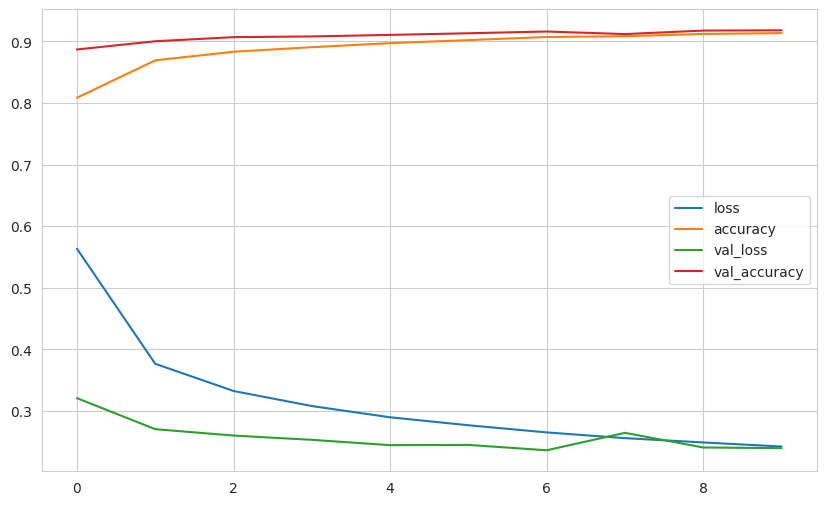

In [52]:
loss_df2.plot()
plt.show()

## Model 2 Evaluation

In [53]:
# Evaluate the model2 on the test data
loss, accuracy = model2.evaluate(X_test, Y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.2747141718864441
Accuracy: 0.9049999713897705


In [54]:
# Make predictions on the test data
pred_prob = model2.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 5s 17ms/step


In [55]:
# Convert true labels to class labels if y_test_arg is not already in class labels form
y_test_arg = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_test_arg, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[889   0  20  29   5   3  49   0   5   0]
 [  0 975   2  16   3   0   3   0   1   0]
 [ 16   0 862  10  73   0  39   0   0   0]
 [ 13   6   9 935  19   0  18   0   0   0]
 [  0   0  64  34 861   0  40   0   1   0]
 [  0   0   0   0   0 968   0  24   0   8]
 [153   1  88  39  69   0 644   0   6   0]
 [  0   0   0   0   0   5   0 974   0  21]
 [  3   1   3   5   4   1   4   4 975   0]
 [  0   0   0   0   0   4   0  28   1 967]]


In [56]:
# Calculate classification report
class_report = classification_report(y_test_arg, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.86      0.84      1000
           3       0.88      0.94      0.90      1000
           4       0.83      0.86      0.85      1000
           5       0.99      0.97      0.98      1000
           6       0.81      0.64      0.72      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000



## Creating Model 3 by adding another dropout layer

In [57]:
# Create a Sequential model 3
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

# Compile the model with specified parameters (using Adam optimizer instead of rmsprop)
model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [58]:
# Train the model with EarlyStopping
model3.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data = (X_val , Y_val), callbacks=[early_stopping])

Epoch 1/20
844/844 [==============================] - 32s 37ms/step - loss: 0.4445 - accuracy: 0.8422 - val_loss: 0.3359 - val_accuracy: 0.8792
Epoch 2/20
844/844 [==============================] - 30s 36ms/step - loss: 0.3009 - accuracy: 0.8913 - val_loss: 0.2620 - val_accuracy: 0.9057
Epoch 3/20
844/844 [==============================] - 31s 37ms/step - loss: 0.2603 - accuracy: 0.9051 - val_loss: 0.2575 - val_accuracy: 0.9025
Epoch 4/20
844/844 [==============================] - 31s 37ms/step - loss: 0.2346 - accuracy: 0.9142 - val_loss: 0.2605 - val_accuracy: 0.9063
Epoch 5/20
844/844 [==============================] - 32s 38ms/step - loss: 0.2137 - accuracy: 0.9213 - val_loss: 0.2322 - val_accuracy: 0.9137
Epoch 6/20
844/844 [==============================] - 32s 38ms/step - loss: 0.1963 - accuracy: 0.9280 - val_loss: 0.2180 - val_accuracy: 0.9230
Epoch 7/20
844/844 [==============================] - 31s 37ms/step - loss: 0.1816 - accuracy: 0.9323 - val_loss: 0.2210 - val_accuracy:

In [59]:
loss_df3 = pd.DataFrame(model3.history.history)
loss_df3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.444,0.842,0.336,0.879
1,0.301,0.891,0.262,0.906
2,0.260,0.905,0.258,0.902
3,0.235,0.914,0.260,0.906
4,0.214,0.921,0.232,0.914


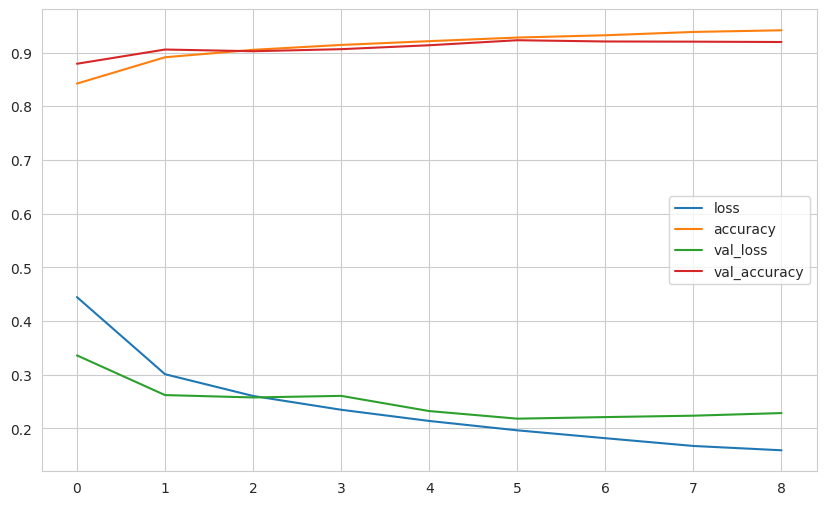

In [60]:
loss_df3.plot()
plt.show()

## Model 3 Evaluation

In [61]:
# Evaluate the model on the test data
loss, accuracy = model3.evaluate(X_test, Y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.24670177698135376
Accuracy: 0.9114999771118164


In [63]:
# Make predictions on the test data
pred_prob = model3.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 3s 8ms/step


In [64]:
# Convert true labels to class labels if y_test_arg is not already in class labels form
y_test_arg = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_test_arg, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[828   0  25  21   3   2 115   0   6   0]
 [  2 975   1  17   2   0   3   0   0   0]
 [ 17   0 880  10  49   0  43   0   1   0]
 [  8   2   8 932  16   0  31   0   3   0]
 [  0   1  61  41 845   0  52   0   0   0]
 [  0   0   0   0   0 986   0  10   0   4]
 [ 65   1  72  30  60   0 763   0   9   0]
 [  0   0   0   0   0  12   0 963   0  25]
 [  2   1   3   3   0   2   1   3 985   0]
 [  0   0   0   0   0   9   1  32   0 958]]


In [65]:
# Calculate classification report
class_report = classification_report(y_test_arg, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.88      0.93      0.91      1000
           4       0.87      0.84      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.76      0.76      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



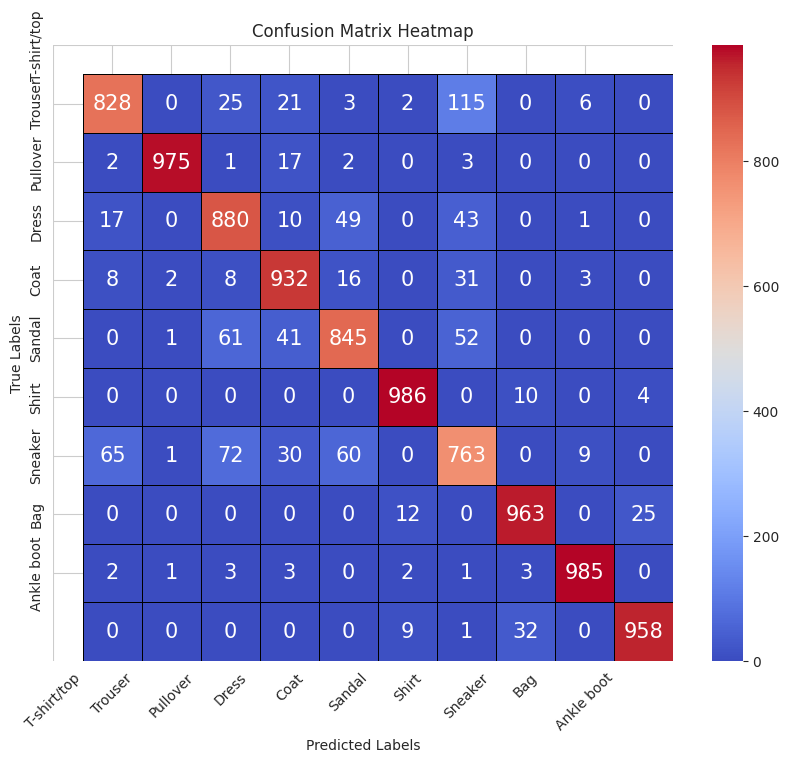

In [66]:
plt.figure(figsize=(10, 8))

cm = confusion_matrix(y_test_arg, y_pred)

# Generate a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size": 15})

# Set labels for the axes and the plot title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Set x-axis and y-axis tick labels based on the class names
tick_marks = [i - 0.5 for i in range(len(classes))]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the heatmap
plt.show()

## Creation of Model 4
- Adding another conv2d layer
- Increasing the Dense layer form "128" to "512"

In [67]:
# Create a Sequential model 4
model4 = Sequential()
model4.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten())

# Add a Dense Layer with 512 neurons and ReLU activation
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [68]:
# Train the model with EarlyStopping
model4.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data = (X_val , Y_val), callbacks=[early_stopping])

Epoch 1/20
844/844 [==============================] - 125s 147ms/step - loss: 0.4898 - accuracy: 0.8199 - val_loss: 0.3288 - val_accuracy: 0.8742
Epoch 2/20
844/844 [==============================] - 123s 146ms/step - loss: 0.3172 - accuracy: 0.8844 - val_loss: 0.2772 - val_accuracy: 0.8952
Epoch 3/20
844/844 [==============================] - 123s 146ms/step - loss: 0.2697 - accuracy: 0.9008 - val_loss: 0.2319 - val_accuracy: 0.9143
Epoch 4/20
844/844 [==============================] - 120s 143ms/step - loss: 0.2404 - accuracy: 0.9111 - val_loss: 0.2278 - val_accuracy: 0.9140
Epoch 5/20
844/844 [==============================] - 123s 146ms/step - loss: 0.2168 - accuracy: 0.9196 - val_loss: 0.2311 - val_accuracy: 0.9142
Epoch 6/20
844/844 [==============================] - 122s 145ms/step - loss: 0.1933 - accuracy: 0.9272 - val_loss: 0.2127 - val_accuracy: 0.9215
Epoch 7/20
844/844 [==============================] - 121s 144ms/step - loss: 0.1732 - accuracy: 0.9356 - val_loss: 0.2316 -

In [69]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.490,0.820,0.329,0.874
1,0.317,0.884,0.277,0.895
2,0.270,0.901,0.232,0.914
3,0.240,0.911,0.228,0.914
4,0.217,0.920,0.231,0.914


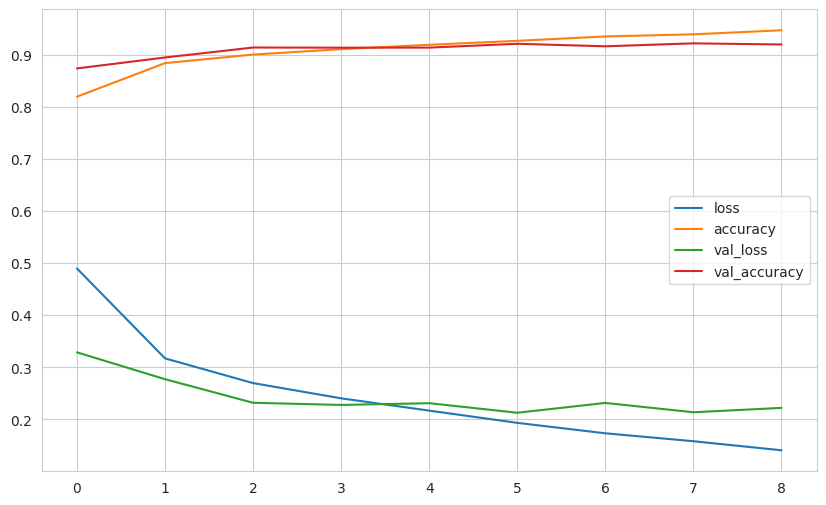

In [70]:
loss_df4.plot()
plt.show()

## Model 4 Evaluation

In [71]:
# Evaluate the model on the test data
loss, accuracy = model4.evaluate(X_test, Y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.2382539063692093
Accuracy: 0.9132000207901001


In [72]:
# Make predictions on the test data
pred_prob = model4.predict(X_test)
y_pred = np.argmax(pred_prob, axis=1)

313/313 [==============================] - 6s 19ms/step


In [73]:
# Convert true labels to class labels if y_test_arg is not already in class labels form
y_test_arg = np.argmax(Y_test, axis=1)

conf_matrix = confusion_matrix(y_test_arg, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[887   0   7  15   3   1  81   0   6   0]
 [  3 980   0  11   2   0   2   0   2   0]
 [ 20   0 834  10  58   0  75   0   3   0]
 [ 14   6   5 926  26   0  21   0   2   0]
 [  3   0  34  19 884   0  60   0   0   0]
 [  0   0   0   0   0 976   0  18   0   6]
 [136   1  44  26  62   0 720   0  11   0]
 [  0   0   0   0   0   8   0 980   0  12]
 [  2   0   3   1   2   1   3   3 985   0]
 [  1   0   0   0   0   4   0  35   0 960]]


In [74]:
# Calculate classification report
class_report = classification_report(y_test_arg, y_pred)

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.90      0.83      0.87      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



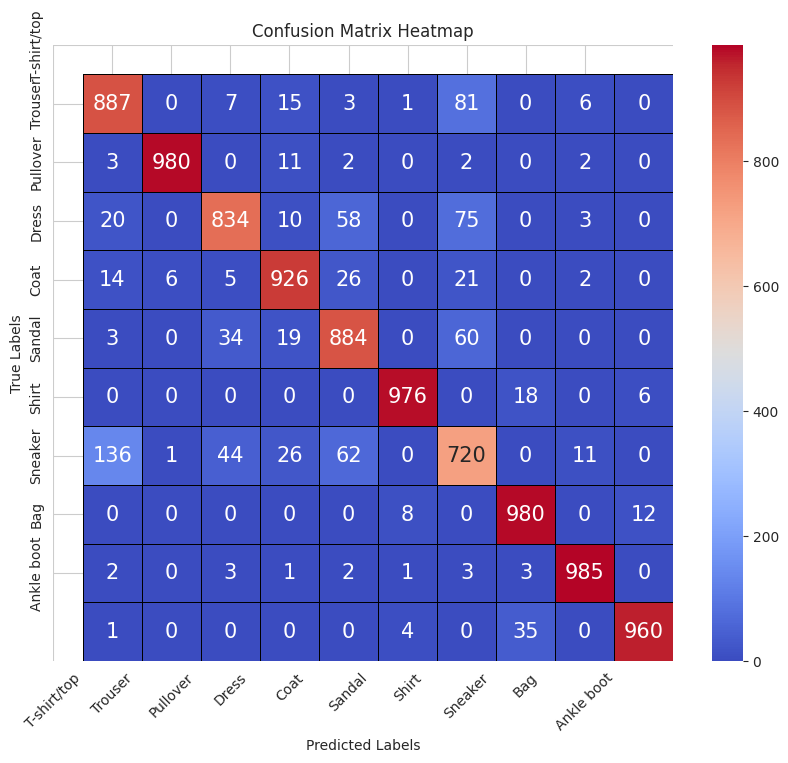

In [75]:
plt.figure(figsize=(10, 8))

cm = confusion_matrix(y_test_arg, y_pred)

# Generate a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="coolwarm", linewidth=0.5, linecolor="black",
            fmt="g", annot_kws={"size": 15})

# Set labels for the axes and the plot title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Set x-axis and y-axis tick labels based on the class names
tick_marks = [i - 0.5 for i in range(len(classes))]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the heatmap
plt.show()


## Prediction of Model 4

In [76]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [77]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

868

In [78]:
np.equal(y_test, y_pred).sum()

9132

## Selecting the final "Model"

Model 1 and 3 should similar results , whereas Model 4 showed slightly a better restults compared with Model 1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___